In [65]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sympy import Point, Line

In [66]:
%config IPCompleter.greedy=True

In [67]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [68]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Feauture Scaling**

In [69]:
scaler = StandardScaler()
df=scaler.fit_transform(df.iloc[:,0:4])

**Principal Component Analysis for Dimentionality Reduction**

In [70]:
#pca = PCA(n_components=3)
#pca.fit(df)

In [71]:
#df_3d=pca.transform(df)

In [72]:
df_3d=df

In [73]:
X = df_3d
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

**Elbow Implimentation with Silhouette Score**

For n_clusters = 2 The average silhouette_score is : 0.580184463257396


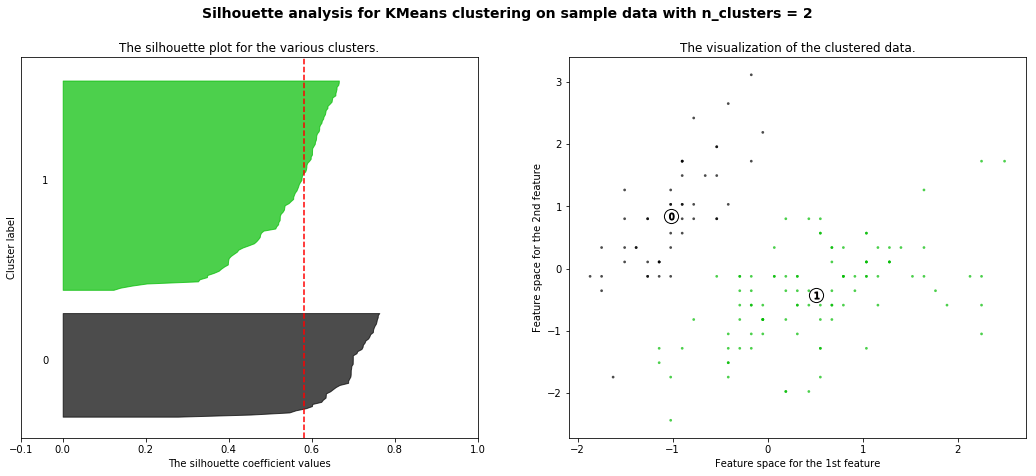

For n_clusters = 3 The average silhouette_score is : 0.46214947389312017


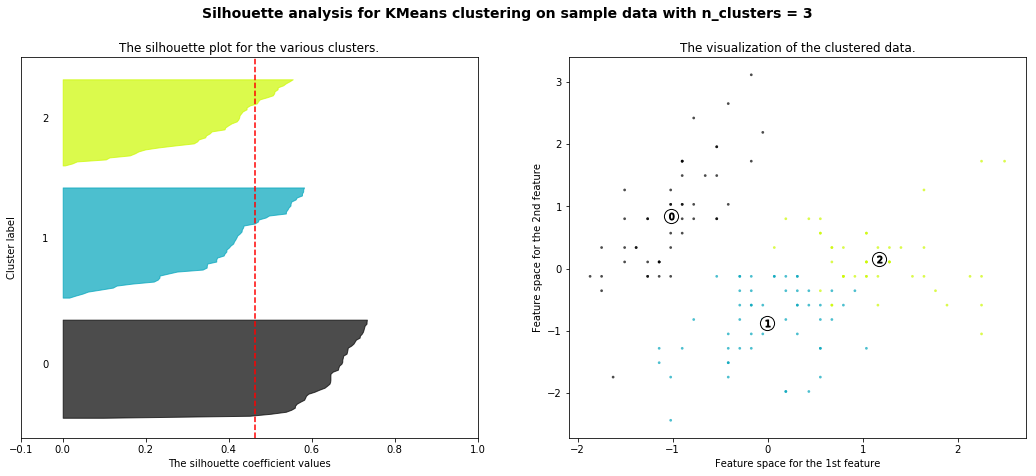

For n_clusters = 4 The average silhouette_score is : 0.3868603029959941


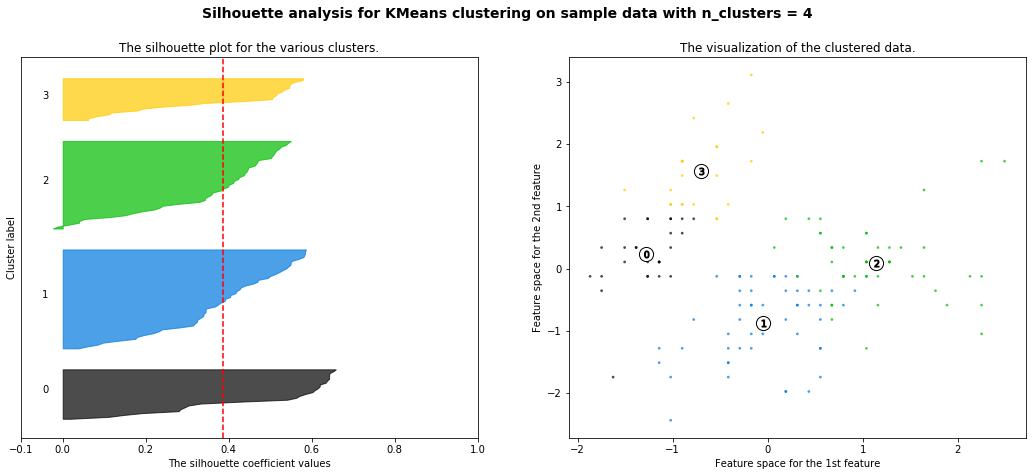

For n_clusters = 5 The average silhouette_score is : 0.34478573455929096


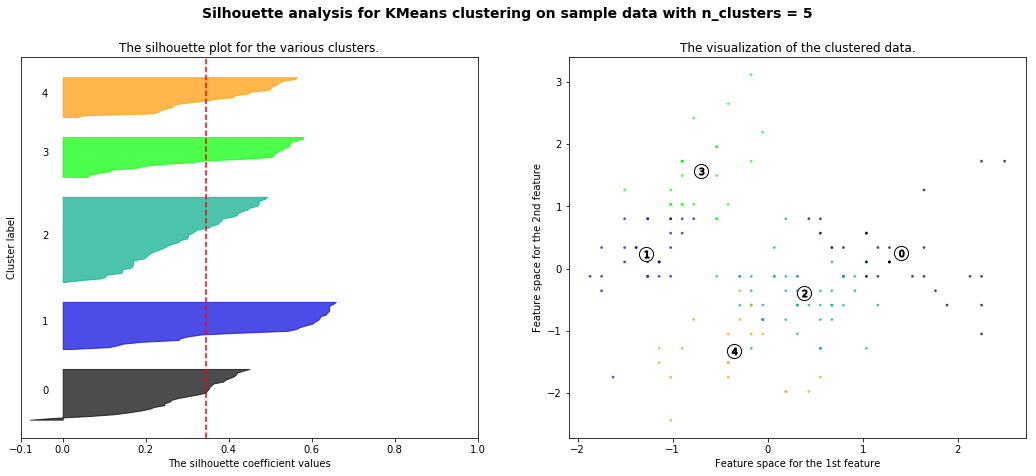

For n_clusters = 6 The average silhouette_score is : 0.3259365058730077


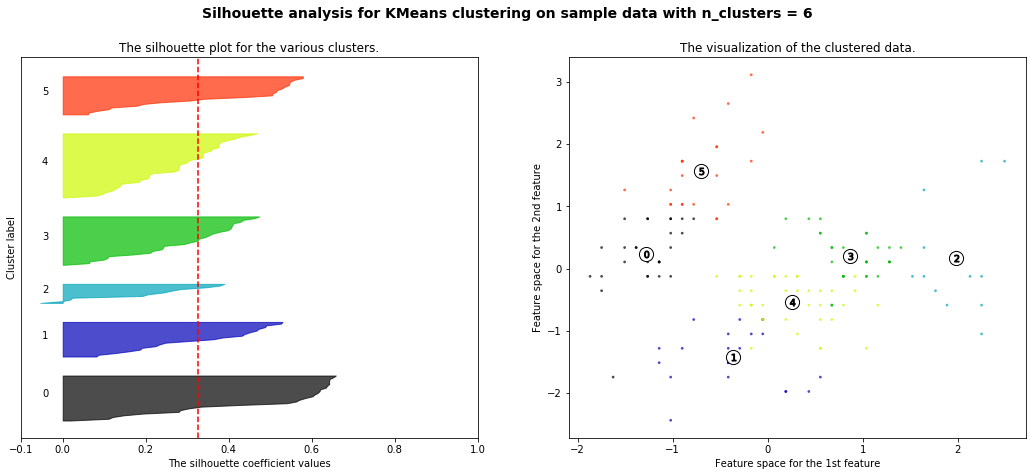

For n_clusters = 7 The average silhouette_score is : 0.3346062225960434


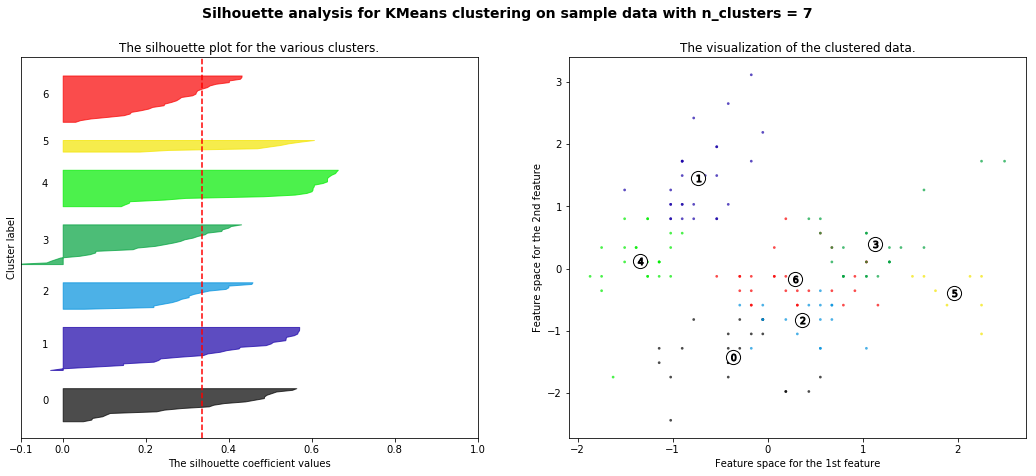

For n_clusters = 8 The average silhouette_score is : 0.33078126678251085


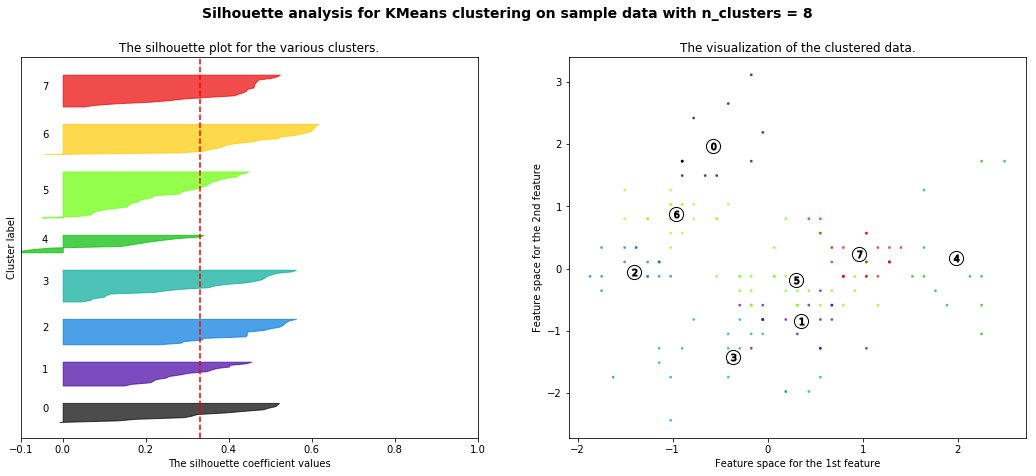

For n_clusters = 9 The average silhouette_score is : 0.3277721739610269


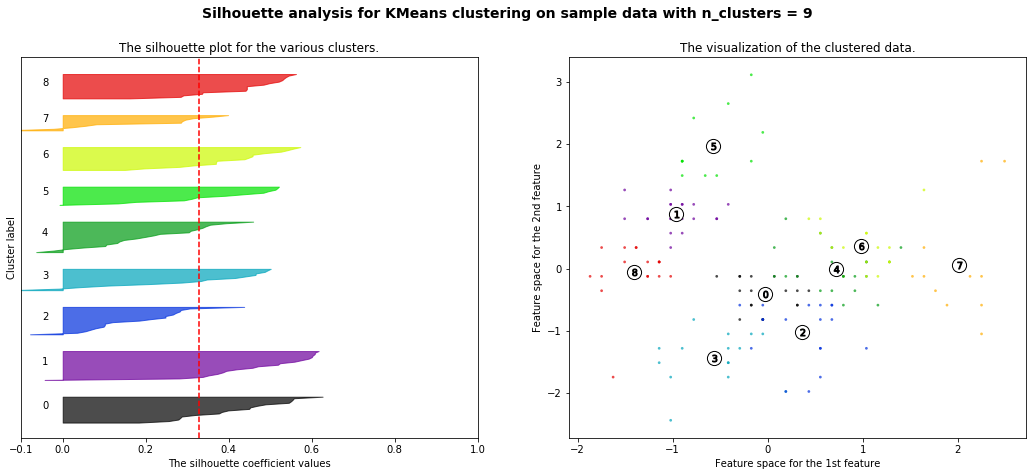

In [74]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
scores = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    scores.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #print("For n_clusters =", n_clusters,"The sample silhouette_score is :", sample_silhouette_values)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [75]:
print(scores)

[0.580184463257396, 0.46214947389312017, 0.3868603029959941, 0.34478573455929096, 0.3259365058730077, 0.3346062225960434, 0.33078126678251085, 0.3277721739610269]


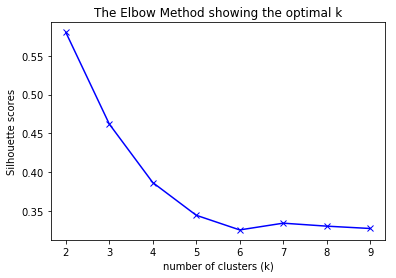

In [76]:
plt.plot(range_n_clusters,scores,'bx-')
plt.xlabel('number of clusters (k)')
plt.ylabel('Silhouette scores')
plt.title('The Elbow Method showing the optimal k')
plt.show()

*In graph above the optimal number of cluster is 3 because we have to choose a value after which there is a reduction in gain, This leaves us with TWO options 3 and 5. Since Silhouette value lies between [-1,1] this means higher the silhouette value better the clustering*  
*ref : http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py*

In [77]:
slope=[]
for i in range(1,8):
    print('score 1 :'+str(scores[i])+' score 2 :'+str(scores[i-1]))
    s= (scores[i]-scores[i-1])
    slope.append([i+2,s])
slope

score 1 :0.46214947389312017 score 2 :0.580184463257396
score 1 :0.3868603029959941 score 2 :0.46214947389312017
score 1 :0.34478573455929096 score 2 :0.3868603029959941
score 1 :0.3259365058730077 score 2 :0.34478573455929096
score 1 :0.3346062225960434 score 2 :0.3259365058730077
score 1 :0.33078126678251085 score 2 :0.3346062225960434
score 1 :0.3277721739610269 score 2 :0.33078126678251085


[[3, -0.11803498936427587],
 [4, -0.07528917089712606],
 [5, -0.04207456843670315],
 [6, -0.018849228686283248],
 [7, 0.00866971672303568],
 [8, -0.003824955813532538],
 [9, -0.0030090928214839274]]

In [78]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 6


In [79]:
distances=[]
for i in range(0,8):
    p1=Point(2,scores[0])
    p2=Point(9,scores[7])
    l1 = Line(p1,p2)
    p=Point(i+2,scores[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 5
